In [1]:
import quad as quad
import romberg as qromb
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

In [2]:
?quad.gauleg

Signature:   quad.gauleg(*args, **kwargs)
Type:        fortran
String form: <fortran function gauleg>
Docstring:  
x,w = gauleg(x1,x2,n)

Wrapper for ``gauleg``.

Parameters
----------
x1 : input float
x2 : input float
n : input int

Returns
-------
x : rank-1 array('d') with bounds (n)
w : rank-1 array('d') with bounds (n)

In [3]:
?quad.gaulag

Signature:   quad.gaulag(*args, **kwargs)
Type:        fortran
String form: <fortran function gaulag>
Docstring:  
x,w = gaulag(n,alf)

Wrapper for ``gaulag``.

Parameters
----------
n : input int
alf : input float

Returns
-------
x : rank-1 array('d') with bounds (n)
w : rank-1 array('d') with bounds (n)

In [4]:
?quad.gauher

Signature:   quad.gauher(*args, **kwargs)
Type:        fortran
String form: <fortran function gauher>
Docstring:  
x,w = gauher(n)

Wrapper for ``gauher``.

Parameters
----------
n : input int

Returns
-------
x : rank-1 array('d') with bounds (n)
w : rank-1 array('d') with bounds (n)

<h2> Q-1 Defining the integrands </h2>

In [5]:
def f1(u):
    return u*sp.special.jv(3,2.7*u)**2

def f2(u):
    return u*sp.special.kv(3,1.2*u)**2

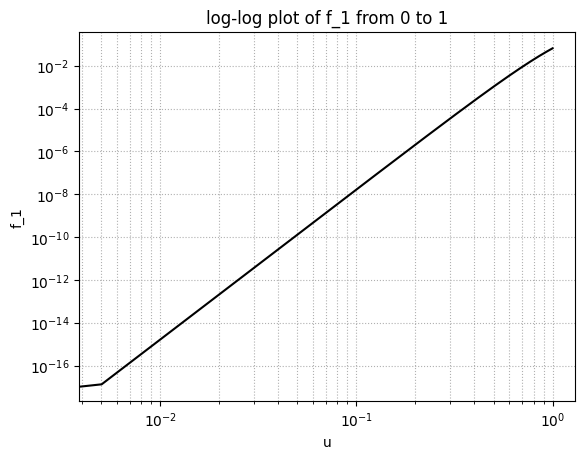

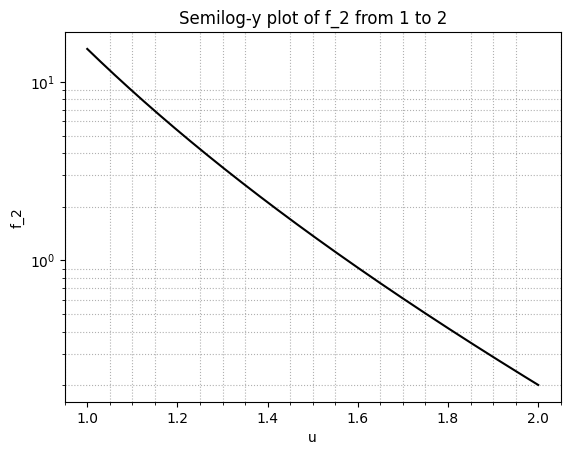

In [6]:
# plotting the integrands 
x = np.linspace(0,1,200)
y = [f1(xi) for xi in x]
plt.loglog(x,y,color='black')
plt.grid(which='both', linestyle=':', linewidth=0.8)
plt.minorticks_on()
plt.title("log-log plot of f_1 from 0 to 1")
plt.xlabel("u")
plt.ylabel("f_1")
plt.show()

x = np.linspace(1,2,2000)
y = [f2(xi) for xi in x]
plt.semilogy(x,y,color='black')
plt.grid(which='minor', linestyle=':', linewidth=0.8)
plt.minorticks_on()
plt.title("Semilog-y plot of f_2 from 1 to 2")
plt.xlabel("u")
plt.ylabel("f_2")
plt.show()

In [7]:
# exact value of both integrals
exact_1 = 1/2*(sp.special.jv(3,2.7)**2 - sp.special.jv(4,2.7)*sp.special.jv(2,2.7))
exact_2 = 1/2*(sp.special.kv(4,1.2)*sp.special.kv(2,1.2) - sp.special.kv(3,1.2)**2)
print(f"Exact value of Integral 1 : {exact_1}")
print(f"Exact value of Integral 2 : {exact_2}")

Exact value of Integral 1 : 0.00996918653426965
Exact value of Integral 2 : 3.092450778617838


<h2>Q2 - Using scipy <b>quad to integrate both</b></h2>

In [8]:
# for f_1
out_1 = sp.integrate.quad(f1, 0, 1, epsabs=1e-12,full_output=1)
print(f"The value of integral obtained : {out_1[0]}")
print(f"The true abs value of error : {abs(out_1[0]-exact_1)}")
print(f"The number of function evalutions : {out_1[2]['neval']}")

The value of integral obtained : 0.009969186534269647
The true abs value of error : 3.469446951953614e-18
The number of function evalutions : 21


In [9]:
# for f_2
out_2 = sp.integrate.quad(f2, 1, np.inf, epsabs=1e-12,full_output=1)
print(f"The value of integral obtained : {out_2[0]}")
print(f"The true abs value of error : {abs(out_2[0]-exact_2)}")
print(f"The number of function evalutions : {out_2[2]['neval']}")

The value of integral obtained : 3.092450778617858
The true abs value of error : 1.9984014443252818e-14
The number of function evalutions : 75


<h2>Q3 - Using <b>Gauss-Legendre</b> to evaluate $I_1$ and <b>Gauss-Hermite/Laguerre</b> to evaluate $I_2$</h2>

In [10]:
# for I_1
# for 21 points

x,w = quad.gauleg(0,1,21)
I_1 = 0.0
for i in range(len(x)):
    I_1 += f1(x[i])*w[i]

print(f"The value of integral obtained : {I_1}")
print(f"Absolute error : {abs(exact_1 - I_1)}")

The value of integral obtained : 0.009969186534269453
Absolute error : 1.97758476261356e-16


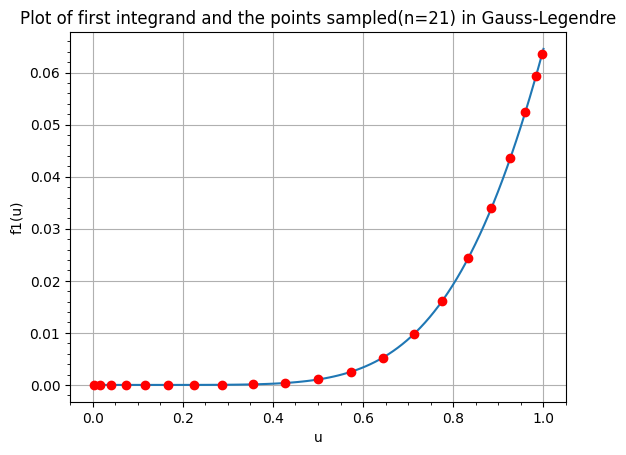

In [11]:
xx = np.linspace(0,1,100)
yy = f1(xx)
plt.plot(xx,yy)
plt.plot(x,f1(x),'ro')
plt.grid()
plt.minorticks_on()
plt.xlabel('u')
plt.ylabel('f1(u)')
plt.title('Plot of first integrand and the points sampled(n=21) in Gauss-Legendre')
plt.show()

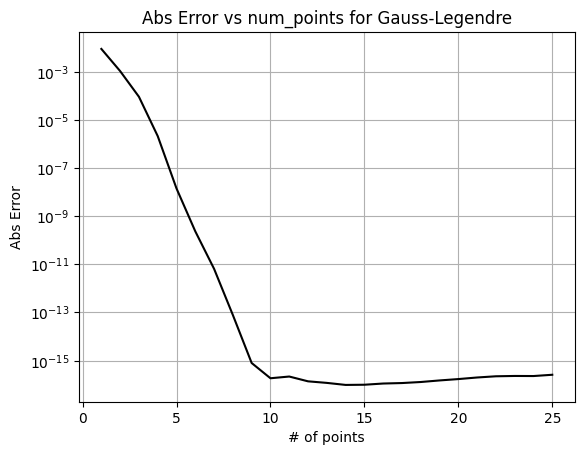

In [12]:
# plotting the error vs number of points
errs_leg = []
for i in range(1,26):
    val = 0.0
    x,w = quad.gauleg(0,1,i)
    for j in range(len(x)):
        val += f1(x[j])*w[j]
    errs_leg.append(abs(val-exact_1))
plt.semilogy(range(1,26),errs_leg,c='black')
plt.grid(which='both')
plt.xlabel('# of points')
plt.ylabel('Abs Error')
plt.title('Abs Error vs num_points for Gauss-Legendre')
plt.show()

<h4><b>Gauss-Laguerre</b></h4>

$I_2 = \int_{1}^{\infty}K_v(g u)^2udu$ making change of variables $t = u - 1$ we get
$I_2 = \int_{0}^{\infty}K_v(g (t+1))^2(t+1)dt$ which is equal to $\int_{0}^{\infty}K_v(g (t+1))^2(t+1)e^te^{-t}dt$ of the form $\int_{0}^{\infty}x^{\alpha}e^{-x}f(x)dx$ where $\alpha$=0 and $f(x) = K_v(g(x+1))(x+1)e^x$

In [13]:
# forI_2

# using gauss-laguerre for 75 points
x,w = quad.gaulag(75,0)
I_2= 0.0
for i in range(len(x)):
    I_2 += w[i]*f2(x[i]+1)*np.exp(x[i])

print(f"The value of integral obtained using gauss-laguerre: {I_2}")
print(f"Absolute error : {abs(exact_2 - I_2)}")

The value of integral obtained using gauss-laguerre: 3.0924507781488115
Absolute error : 4.69026595339983e-10


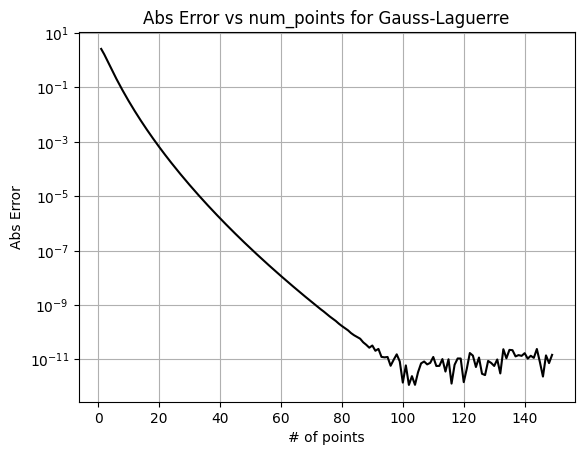

In [14]:
# err vs num of points
errs_lag = []
for i in range(1,150):
    val = 0.0
    x,w = quad.gaulag(i,0)
    for j in range(len(x)):
        val += w[j]*f2(x[j]+1)*np.exp(x[j])
    errs_lag.append(abs(val-exact_2))
plt.semilogy(range(1,150),errs_lag,c='black')
plt.grid(which='both')
plt.xlabel('# of points')
plt.ylabel('Abs Error')
plt.title('Abs Error vs num_points for Gauss-Laguerre')
plt.show()

<h4><b>Gauss-Hermite</b></h4>

$\int_{-\infty}^{\infty}f_2(e^t+1)e^{t+t^2}e^{-t^2}dt$

In [15]:
# using gauss-hermite for 75 points

x,w = quad.gauher(75)
I_2 = 0.0
for i in range(len(x)):
    I_2 += w[i]*f2(np.exp(x[i]) + 1)*np.exp(x[i] + x[i]**2)

print(f"The value of integral obtained using gauss-hermite: {I_2}")
print(f"Absolute error : {abs(exact_2 - I_2)}")

The value of integral obtained using gauss-hermite: 3.0923456818119854
Absolute error : 0.0001050968058526891


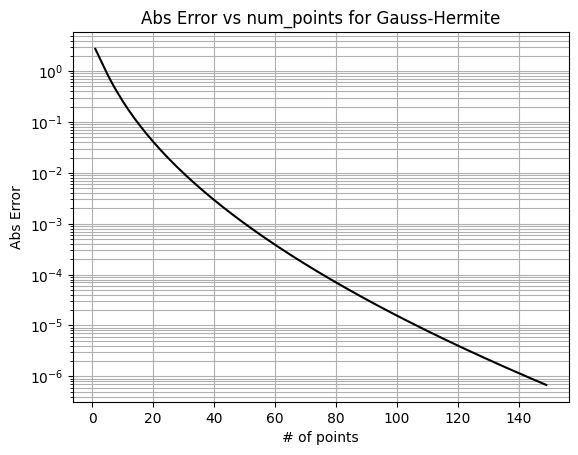

In [16]:
# err vs num_points for gauss-hermite
errs_her = []
for i in range(1,150):
    val = 0.0
    x,w = quad.gauher(i)
    for j in range(len(x)):
        val += w[j]*f2(np.exp(x[j]) + 1)*np.exp(x[j] + x[j]**2)
    errs_her.append(abs(val-exact_2))
plt.semilogy(range(1,150),errs_her,c='black')
plt.grid(which='both')
plt.xlabel('# of points')
plt.ylabel('Abs Error')
plt.title('Abs Error vs num_points for Gauss-Hermite')
plt.show()

<h2> Q4 - Using <b>Romberg</b> to evalute $I_1$ </h2>

In [17]:
value,_,num_calls = qromb.qromb(f1,0,1,1e-12)
print(f"The value of integral obtained : {value}")
print(f"The absolute value of true error : {abs(value-exact_1)}")
print(f"Number of function calls : {num_calls}")

The value of integral obtained : 0.009969186534269642
The absolute value of true error : 8.673617379884035e-18
Number of function calls : 129


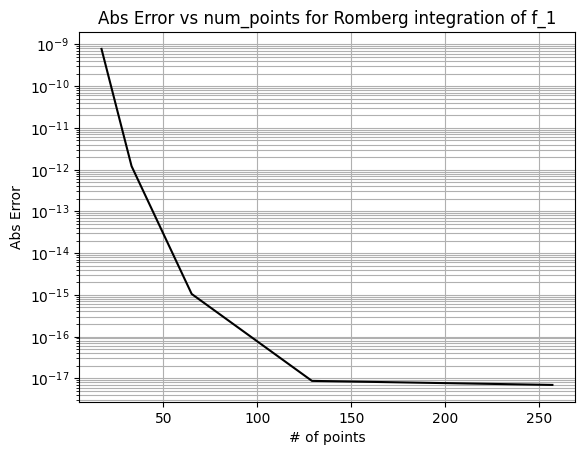

In [33]:
# err vs num_points
errs_romb_1= []
num_points_romb_1 = []
for i in range(-1,-15,-1):
    val,_,num_calls = qromb.qromb(f1,0,1,10**i)
    errs_romb_1.append(abs(val-exact_1))
    num_points_romb_1.append(num_calls)
plt.semilogy(num_points_romb_1,errs_romb_1,c='black')
plt.grid(which='both')
plt.xlabel('# of points')
plt.ylabel('Abs Error')
plt.title('Abs Error vs num_points for Romberg integration of f_1')
plt.show()

<h2>Q5 - Using <b>Romberg</b> to evalute $I_2$</h2>

In [19]:
new_int = lambda w : f2(np.tan(w))*(1/np.cos(w))**2

value,_,num_calls = qromb.qromb(new_int,np.pi/4, np.pi/2, 1e-12)
print(f"The value of integral obtained : {value}")
print(f"The absolute value of true error : {abs(value-exact_2)}")
print(f"Number of function calls : {num_calls}")

The value of integral obtained : 3.092450778617848
The absolute value of true error : 9.769962616701378e-15
Number of function calls : 257


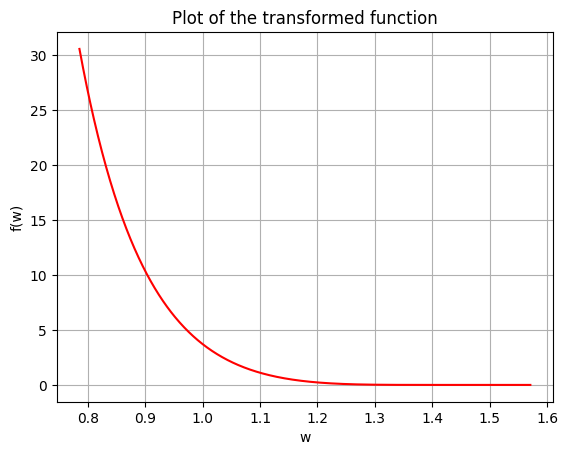

In [20]:
xx = np.linspace(np.pi/4,np.pi/2,1000, endpoint=True)
yy = new_int(xx)
plt.plot(xx,yy,c='r')
plt.xlabel('w')
plt.ylabel('f(w)')
plt.grid()
plt.title('Plot of the transformed function')
plt.show()

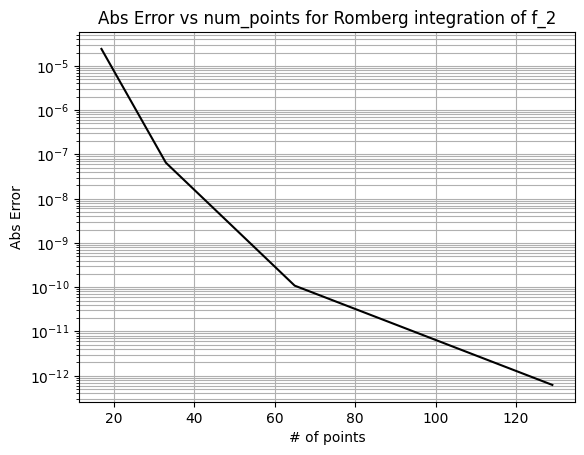

In [21]:
# err vs num_points

errs_romb_2= []
num_points_romb_2 = []
for i in range(-1,-12,-1):
    val,_,num_calls = qromb.qromb(new_int,np.pi/4,np.pi/2,10**i)
    errs_romb_2.append(abs(val-exact_2))
    num_points_romb_2.append(num_calls)
plt.semilogy(num_points_romb_2,errs_romb_2,c='black')
plt.grid(which='both')
plt.xlabel('# of points')
plt.ylabel('Abs Error')
plt.title('Abs Error vs num_points for Romberg integration of f_2')
plt.show()

<h2>Q6 - Comparing different methods</h2>

<h3>For $I_1$</h3>

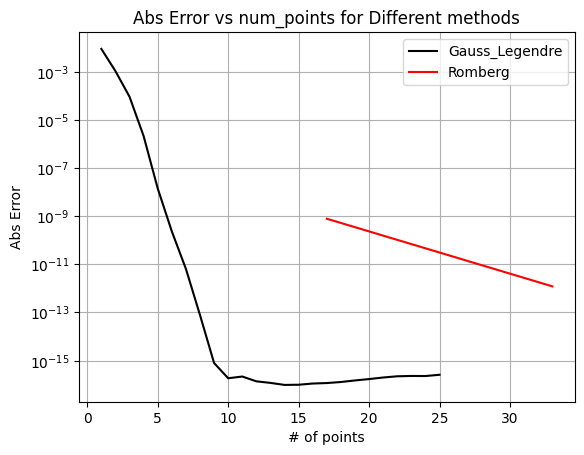

In [22]:
plt.semilogy(range(1,26),errs_leg,c='black')
plt.semilogy(num_points_romb_1,errs_romb_1,c='red')
plt.grid(which='both')
plt.xlabel('# of points')
plt.ylabel('Abs Error')
plt.title('Abs Error vs num_points for Different methods')
plt.legend(['Gauss_Legendre','Romberg'])
plt.show()

<h3>For $I_2$</h3>

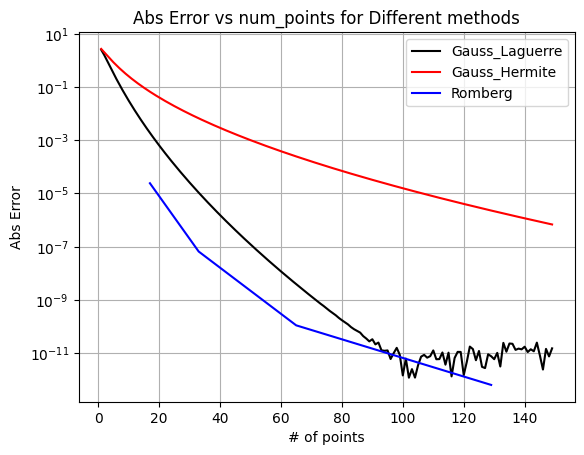

In [23]:
plt.semilogy(range(1,150),errs_lag,c='black')
plt.semilogy(range(1,150),errs_her,c='red')
plt.semilogy(num_points_romb_2,errs_romb_2,c='blue')
plt.grid(which='both')
plt.xlabel('# of points')
plt.ylabel('Abs Error')
plt.title('Abs Error vs num_points for Different methods')
plt.legend(['Gauss_Laguerre','Gauss_Hermite','Romberg'])
plt.show()

<h2> Q7 - Transformation of new integral </h2>

In [24]:
def f(t):
    return np.exp(-t-2)*np.sqrt(1-t*t)/sp.special.jv(1,np.sqrt(1-t**2))

def integrand(t):
    return np.exp(-t-2)/sp.special.jv(1,np.sqrt(1-t**2))

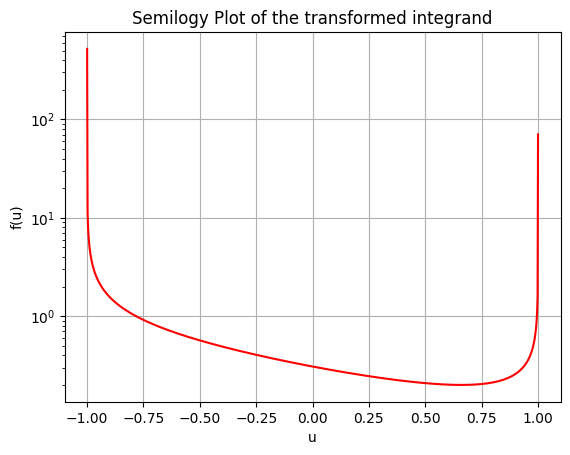

In [25]:
# plotting the new integrand

eps = 1e-6
xx = np.linspace(-1+eps,1-eps,1000)
yy = integrand(xx)
plt.semilogy(xx,yy,c='red')
plt.xlabel('u')
plt.ylabel('f(u)')
plt.grid()
plt.title('Semilogy Plot of the transformed integrand')
plt.show()

<h2> Q8 - Evaluating the integral using <b>Gauss-Chebyshev</b></h2>

In [26]:
def gaucheb(N):
    j=np.array(range(1,N+1))
    x=np.cos(np.pi*(j-0.5)/N)
    w=np.full(N,np.pi/N)
    return x,w

In [27]:
x,w = gaucheb(20)
exact = 0.0
for i in range(len(x)):
    exact += w[i]*f(x[i])
print(exact)

1.1404899385527607


In [28]:
actual_exact = sp.integrate.quad(integrand,-1,1,epsabs=1e-12)[0]
print(actual_exact)

1.1404899385526883


In [29]:
errs_cheb = []
errs_new = []
for i in range(1,20):
    x,w = gaucheb(i)
    I = 0.0
    for j in range(len(x)):
        I += w[j]*f(x[j])
    errs_cheb.append(abs(I-exact))
    errs_new.append(abs(I-actual_exact))

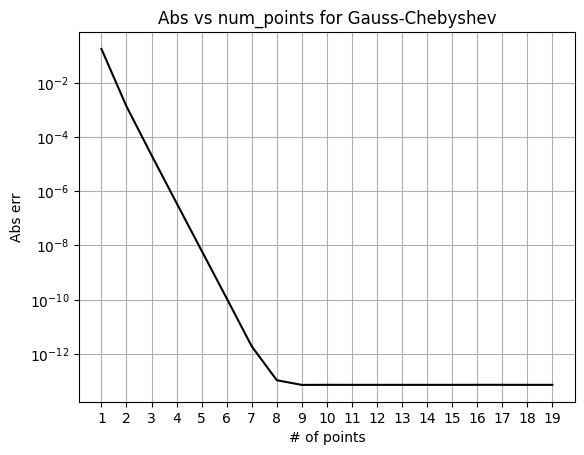

In [35]:
plt.semilogy(range(1,20),errs_new,c='black')
plt.xticks(range(1,20))
plt.xlabel('# of points')
plt.ylabel('Abs err')
plt.title('Abs vs num_points for Gauss-Chebyshev')
plt.grid()
plt.show()

In [31]:
print(gaucheb(10)[0])

[ 0.98768834  0.89100652  0.70710678  0.4539905   0.15643447 -0.15643447
 -0.4539905  -0.70710678 -0.89100652 -0.98768834]


In [32]:
print(gaucheb(20)[0])

[ 0.99691733  0.97236992  0.92387953  0.85264016  0.76040597  0.64944805
  0.52249856  0.38268343  0.23344536  0.0784591  -0.0784591  -0.23344536
 -0.38268343 -0.52249856 -0.64944805 -0.76040597 -0.85264016 -0.92387953
 -0.97236992 -0.99691733]


In [3]:
x,w = quad.gaulag(75,0)

In [4]:
((np.pi*np.exp(-2.4))/(2.4)**2)*np.sum(w)

np.float64(0.04947896798657639)